## Tape bump assessment (py3). CCD 01
Remember the tape bump is temperature-variation dependent

In [1]:
import os
import time
import numpy as np
import scipy.linalg
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from astropy import time
# from skimage import data, img_as_float
from skimage.measure import compare_ssim
from astropy.visualization import (MinMaxInterval, SqrtStretch,
                                   ImageNormalize, ZScaleInterval)
%matplotlib notebook

Load the data from basic statistics time series. For *tapebump\_centeright_{band}.npy* files, the statistic was extracted from Y4A1 tag, from 20161013 to 20161101


In [2]:
# Initial set, 20161013t1101
g_stat = np.load('tapebump_centeright_y4a1_g.npy')
r_stat = np.load('tapebump_centeright_y4a1_r.npy')
i_stat = np.load('tapebump_centeright_y4a1_i.npy')
z_stat = np.load('tapebump_centeright_y4a1_z.npy')
Y_stat = np.load('tapebump_centeright_y4a1_Y.npy')
# Larger set, 20161001t1208
g_stat_s2 = np.load('tapebump_centeright_y4a1_20161001t1208_g.npy')
r_stat_s2 = np.load('tapebump_centeright_y4a1_20161001t1208_r.npy')
i_stat_s2 = np.load('tapebump_centeright_y4a1_20161001t1208_i.npy')
z_stat_s2 = np.load('tapebump_centeright_y4a1_20161001t1208_z.npy')
Y_stat_s2 = np.load('tapebump_centeright_y4a1_20161001t1208_Y.npy')

Which fields do the simple stats has?

In [3]:
g_stat.dtype

dtype([('mean', '<f8'), ('median', '<f8'), ('std', '<f8'), ('min', '<i8'), ('max', '<i8'), ('mad', '<f8'), ('rms', '<f8'), ('nite', '<i8'), ('expnum', '<i8'), ('exptime', '<i8'), ('band', 'S10'), ('mjd', '<f8')])

Quick plots for assessment of time periods when the tapebump appears in the image. Then, visualize some of these in a movie-like plotting

In [4]:
days = [np.ptp(x['mjd']) for x in [g_stat, r_stat, i_stat, z_stat, Y_stat]] 

In [5]:
days_s2 = [np.ptp(x['mjd']) for x in [g_stat_s2, r_stat_s2, i_stat_s2, z_stat_s2, Y_stat_s2]] 

### For the smaller set, covering from 20161013 to 20161101

<IPython.core.display.Javascript object>


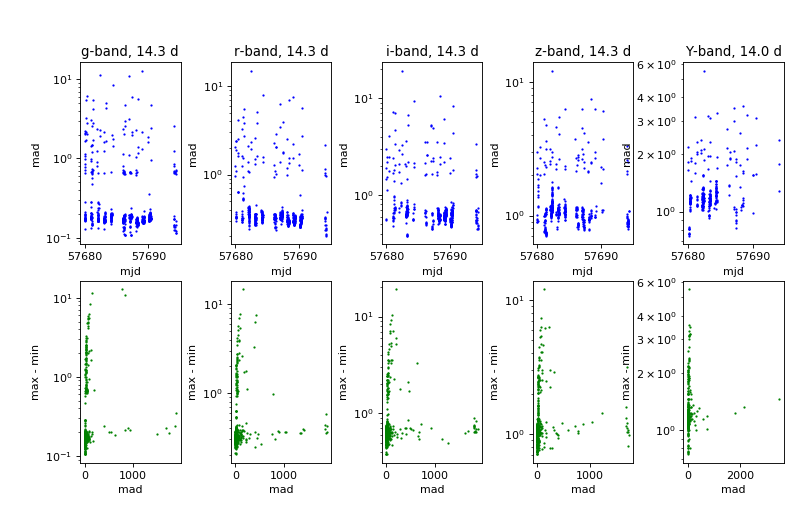

In [6]:
var_y1 = 'mad'
kw1 = {
    's' : 1, 
    'color' : 'blue',
}
fig, ax = plt.subplots(2, 5, figsize=(10, 6.5))
ax[0, 0].scatter(g_stat['mjd'], g_stat[var_y1], **kw1)
ax[0, 1].scatter(r_stat['mjd'], r_stat[var_y1], **kw1)
ax[0, 2].scatter(i_stat['mjd'], i_stat[var_y1], **kw1)
ax[0, 3].scatter(z_stat['mjd'], z_stat[var_y1], **kw1)
ax[0, 4].scatter(Y_stat['mjd'], Y_stat[var_y1], **kw1)
#
kw2 = {
    's' : 1,
    'color' : 'green',
}
ax[1, 0].scatter(g_stat['max'] - g_stat['min'], g_stat['mad'], **kw2)
ax[1, 1].scatter(r_stat['max'] - r_stat['min'], r_stat['mad'], **kw2)
ax[1, 2].scatter(i_stat['max'] - i_stat['min'], i_stat['mad'], **kw2)
ax[1, 3].scatter(z_stat['max'] - z_stat['min'], z_stat['mad'], **kw2)
ax[1, 4].scatter(Y_stat['max'] - Y_stat['min'], Y_stat['mad'], **kw2)
#
bands = ['g', 'r', 'i', 'z', 'Y']
for idx, s in enumerate(ax[0, :]):
    s.set_yscale('log')
    s.set_xlabel('mjd')
    s.set_ylabel('mad')
    s.set_title('{0}-band, {1:.1f} d'.format(bands[idx], days[idx]))
for idx, s in enumerate(ax[1, :]):
    s.set_yscale('log')
    s.set_xlabel('mad')
    s.set_ylabel('max - min')
#    
plt.subplots_adjust(wspace=0.5, left=0.1, right=0.98)

### A very hands-on selection, small set

Let's start by g-band, using astropy for imashow color scaling. 

In [ ]:
sel_g = g_stat[np.where(np.logical_and((g_stat['max'] - g_stat['min']) > 50, g_stat['mad'] > 0.4))]
# works too: [np.where(g_stat['mean'] < 0.4)]
# [np.where(g_stat['mad'] > 0.4)]
# [np.where(g_stat['min'] < -2)]
# [np.where(np.logical_and((g_stat['max'] - g_stat['min']) > 50, g_stat['mean'] < 0))]
sel_g_path = ['stamps/tape_centeright-y4a1_g_D00{0}.npy'.format(e) for e in sel_g['expnum']]

r-band

In [ ]:
sel_r = r_stat[np.where(np.logical_and((r_stat['max'] - r_stat['min']) > 50, r_stat['mad'] > 0.4))]
sel_r_path = ['stamps/tape_centeright-y4a1_r_D00{0}.npy'.format(e) for e in sel_r['expnum']]

i-band

In [ ]:
sel_i = i_stat[np.where(np.logical_and((i_stat['max'] - i_stat['min']) > 50, i_stat['mad'] > 0.4))]
sel_i_path = ['stamps/tape_centeright-y4a1_i_D00{0}.npy'.format(e) for e in sel_i['expnum']]

z-band

In [ ]:
sel_z = z_stat[np.where(np.logical_and((z_stat['max'] - z_stat['min']) > 50, z_stat['mad'] > 0.4))]
sel_z_path = ['stamps/tape_centeright-y4a1_z_D00{0}.npy'.format(e) for e in sel_z['expnum']]

Y-band

In [ ]:
sel_Y = Y_stat[np.where(np.logical_and((Y_stat['max'] - Y_stat['min']) > 20, Y_stat['mad'] > 0.4))]
sel_Y_path = ['stamps/tape_centeright-y4a1_Y_D00{0}.npy'.format(e) for e in sel_Y['expnum']]

In [ ]:
print('Number of selected per band: g={0}, r={1}, z={2}, Y={3}'.format(sel_g.size, 
                                                                       sel_r.size, 
                                                                       sel_i.size,
                                                                       sel_z.size,
                                                                       sel_Y.size))

Set animated plots 

In [ ]:
def visual_sequence(path_list, anim_interval=200, anim_repeat=False, anim_save=False, outfnm=None):
    ''' Function to receive a list of full paths to files to be 
    displayed in order, in overlapping sequence.
    '''
    fig = plt.figure()
    ims = []
    for i in path_list:
        aux_x = np.load(i)
        # Normalize image, using astropy zscale for range, and square root for 
        # stretching (?)
        im_norm = ImageNormalize(aux_x, 
                                 interval=ZScaleInterval(),
                                 stretch=SqrtStretch())
        # Append each of the plots to a list
        kw  = {
            'origin' : 'lower', 
            'animated' : True, 
            'cmap' : 'gray_r',
        }
        im = plt.imshow(aux_x, norm=im_norm, **kw)
        ims.append([im])
    # Using the plot-populated list, create the animation
    # blitting (True/False) useful when the frame can be slightly modified to 
    # create the next frame
    ani = animation.ArtistAnimation(fig, ims, 
                                    interval=anim_interval, 
                                    blit=True,
                                    repeat_delay=1000, 
                                    repeat=anim_repeat)
    if anim_save:
        if (outfnm is None):
            outfnm = 'pid{0}.mp4'.format(os.getpid())
        # Set up formatting for the movie files
        aux_wr1 = animation.writers['ffmpeg']
        aux_writer = aux_wr1(fps=15, metadata=dict(artist='F Paz-Chinchon'), bitrate=2000, dpi=300)
        ani.save(outfnm, writer=aux_writer)
    else:
        plt.show()

## Plots for the small set, covering ~15 days

In [ ]:
path_list = sel_g_path
anim_interval = 200
anim_repeat = False
anim_save = True
outfnm = 'g_tapebump_c01.mp4'
#
fig = plt.figure()
ims = []
for i in path_list:
    aux_x = np.load(i)
    # Normalize image, using astropy zscale for range, and square root for 
    # stretching (?)
    im_norm = ImageNormalize(aux_x, 
                             interval=ZScaleInterval(),
                             stretch=SqrtStretch())
    # Append each of the plots to a list
    kw  = {
        'origin' : 'lower', 
        'animated' : True, 
        'cmap' : 'gray_r',
    }
    im = plt.imshow(aux_x, norm=im_norm, **kw)
    ims.append([im])
# Using the plot-populated list, create the animation
# blitting (True/False) useful when the frame can be slightly modified to 
# create the next frame
ani = animation.ArtistAnimation(fig, ims, 
                                interval=anim_interval, 
                                blit=True,
                                repeat_delay=1000, 
                                repeat=anim_repeat)
plt.colorbar()
plt.suptitle('g-band, CCD 1, middle-right tapebump', color='dodgerblue')
if anim_save:
    if (outfnm is None):
        outfnm = 'pid{0}.mp4'.format(os.getpid())
    # Set up formatting for the movie files
    aux_wr1 = animation.writers['ffmpeg']
    aux_writer = aux_wr1(fps=5, metadata=dict(artist='F Paz-Chinchon'), bitrate=2000)
    ani.save(outfnm, writer=aux_writer)
    # plt.show()
else:
    plt.show()

In [ ]:
path_list = sel_r_path
anim_interval = 200
anim_repeat = False
anim_save = True
outfnm = 'r_tapebump_c01.mp4'
#
fig = plt.figure()
ims = []
for i in path_list:
    aux_x = np.load(i)
    # Normalize image, using astropy zscale for range, and square root for 
    # stretching (?)
    im_norm = ImageNormalize(aux_x, 
                             interval=ZScaleInterval(),
                             stretch=SqrtStretch())
    # Append each of the plots to a list
    kw  = {
        'origin' : 'lower', 
        'animated' : True, 
        'cmap' : 'gray_r',
    }
    im = plt.imshow(aux_x, norm=im_norm, **kw)
    ims.append([im])
# Using the plot-populated list, create the animation
# blitting (True/False) useful when the frame can be slightly modified to 
# create the next frame
ani = animation.ArtistAnimation(fig, ims, 
                                interval=anim_interval, 
                                blit=True,
                                repeat_delay=1000, 
                                repeat=anim_repeat)
plt.suptitle('r-band, CCD 1, middle-right tapebump', color='dodgerblue')
plt.colorbar()
if anim_save:
    if (outfnm is None):
        outfnm = 'pid{0}.mp4'.format(os.getpid())
    # Set up formatting for the movie files
    aux_wr1 = animation.writers['ffmpeg']
    aux_writer = aux_wr1(fps=5, metadata=dict(artist='F Paz-Chinchon'), bitrate=2000)
    ani.save(outfnm, writer=aux_writer)
    # plt.show()
else:
    plt.show()

In [ ]:
path_list = sel_i_path
anim_interval = 200
anim_repeat = False
anim_save = True
outfnm = 'i_tapebump_c01.mp4'
#
fig = plt.figure()
ims = []
for i in path_list:
    aux_x = np.load(i)
    # Normalize image, using astropy zscale for range, and square root for 
    # stretching (?)
    im_norm = ImageNormalize(aux_x, 
                             interval=ZScaleInterval(),
                             stretch=SqrtStretch())
    # Append each of the plots to a list
    kw  = {
        'origin' : 'lower', 
        'animated' : True, 
        'cmap' : 'gray_r',
    }
    im = plt.imshow(aux_x, norm=im_norm, **kw)
    ims.append([im])
# Using the plot-populated list, create the animation
# blitting (True/False) useful when the frame can be slightly modified to 
# create the next frame
ani = animation.ArtistAnimation(fig, ims, 
                                interval=anim_interval, 
                                blit=True,
                                repeat_delay=1000, 
                                repeat=anim_repeat)
plt.suptitle('i-band, CCD 1, middle-right tapebump', color='dodgerblue')
plt.colorbar()
if anim_save:
    if (outfnm is None):
        outfnm = 'pid{0}.mp4'.format(os.getpid())
    # Set up formatting for the movie files
    aux_wr1 = animation.writers['ffmpeg']
    aux_writer = aux_wr1(fps=5, metadata=dict(artist='F Paz-Chinchon'), bitrate=2000)
    ani.save(outfnm, writer=aux_writer)
    plt.show()
else:
    plt.show()

In [ ]:
path_list = sel_z_path
anim_interval = 200
anim_repeat = False
anim_save = True
outfnm = 'z_tapebump_c01.mp4'
#
fig = plt.figure()
ims = []
for i in path_list:
    aux_x = np.load(i)
    # Normalize image, using astropy zscale for range, and square root for 
    # stretching (?)
    im_norm = ImageNormalize(aux_x, 
                             interval=ZScaleInterval(),
                             stretch=SqrtStretch())
    # Append each of the plots to a list
    kw  = {
        'origin' : 'lower', 
        'animated' : True, 
        'cmap' : 'gray_r',
    }
    im = plt.imshow(aux_x, norm=im_norm, **kw)
    ims.append([im])
# Using the plot-populated list, create the animation
# blitting (True/False) useful when the frame can be slightly modified to 
# create the next frame
ani = animation.ArtistAnimation(fig, ims, 
                                interval=anim_interval, 
                                blit=True,
                                repeat_delay=1000, 
                                repeat=anim_repeat)
plt.suptitle('z-band, CCD 1, middle-right tapebump', color='dodgerblue')
plt.colorbar()
if anim_save:
    if (outfnm is None):
        outfnm = 'pid{0}.mp4'.format(os.getpid())
    # Set up formatting for the movie files
    aux_wr1 = animation.writers['ffmpeg']
    aux_writer = aux_wr1(fps=5, metadata=dict(artist='F Paz-Chinchon'), bitrate=2000)
    ani.save(outfnm, writer=aux_writer)
    plt.show()
else:
    plt.show()

In [ ]:
path_list = sel_Y_path
anim_interval = 200
anim_repeat = False
anim_save = True
outfnm = 'Y_tapebump_c01.mp4'
#
fig = plt.figure()
ims = []
for i in path_list:
    aux_x = np.load(i)
    # Normalize image, using astropy zscale for range, and square root for 
    # stretching (?)
    im_norm = ImageNormalize(aux_x, 
                             interval=ZScaleInterval(),
                             stretch=SqrtStretch())
    # Append each of the plots to a list
    kw  = {
        'origin' : 'lower', 
        'animated' : True, 
        'cmap' : 'gray_r',
    }
    im = plt.imshow(aux_x, norm=im_norm, **kw)
    ims.append([im])
# Using the plot-populated list, create the animation
# blitting (True/False) useful when the frame can be slightly modified to 
# create the next frame
ani = animation.ArtistAnimation(fig, ims, 
                                interval=anim_interval, 
                                blit=True,
                                repeat_delay=1000, 
                                repeat=anim_repeat)
plt.suptitle('Y-band, CCD 1, middle-right tapebump', color='dodgerblue')
plt.colorbar()
if anim_save:
    if (outfnm is None):
        outfnm = 'pid{0}.mp4'.format(os.getpid())
    # Set up formatting for the movie files
    aux_wr1 = animation.writers['ffmpeg']
    aux_writer = aux_wr1(fps=5, metadata=dict(artist='F Paz-Chinchon'), bitrate=2000)
    ani.save(outfnm, writer=aux_writer)
    plt.show()
else:
    plt.show()

## Now for the larger set, from 20161001 to 20171208

### Diagnosis plot for the larger set, covering from 20161001 to 20161208

<IPython.core.display.Javascript object>


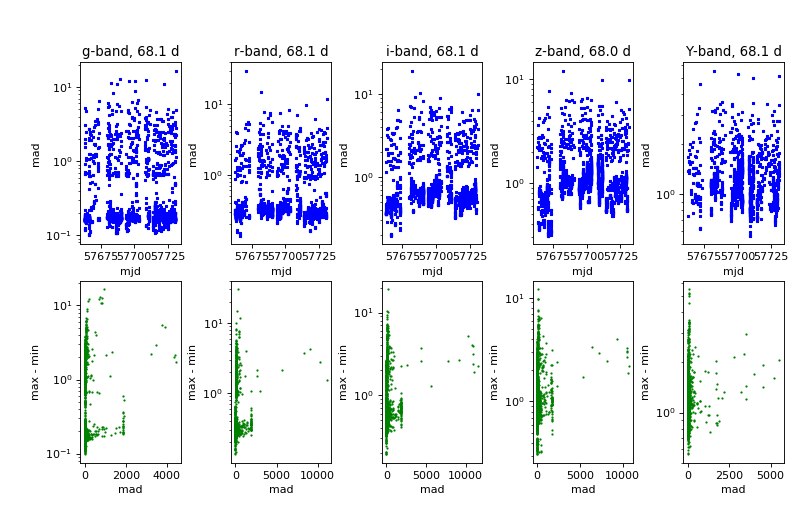

In [7]:
var_y1 = 'mad'
kw1 = {
    'marker' : 's',
    's' : 1, 
    'color' : 'blue',
}
fig, ax = plt.subplots(2, 5, figsize=(10, 6.5))
ax[0, 0].scatter(g_stat_s2['mjd'], g_stat_s2[var_y1], **kw1)
ax[0, 1].scatter(r_stat_s2['mjd'], r_stat_s2[var_y1], **kw1)
ax[0, 2].scatter(i_stat_s2['mjd'], i_stat_s2[var_y1], **kw1)
ax[0, 3].scatter(z_stat_s2['mjd'], z_stat_s2[var_y1], **kw1)
ax[0, 4].scatter(Y_stat_s2['mjd'], Y_stat_s2[var_y1], **kw1)
#
kw2 = {
    's' : 1,
    'color' : 'green',
}
ax[1, 0].scatter(g_stat_s2['max'] - g_stat_s2['min'], g_stat_s2['mad'], **kw2)
ax[1, 1].scatter(r_stat_s2['max'] - r_stat_s2['min'], r_stat_s2['mad'], **kw2)
ax[1, 2].scatter(i_stat_s2['max'] - i_stat_s2['min'], i_stat_s2['mad'], **kw2)
ax[1, 3].scatter(z_stat_s2['max'] - z_stat_s2['min'], z_stat_s2['mad'], **kw2)
ax[1, 4].scatter(Y_stat_s2['max'] - Y_stat_s2['min'], Y_stat_s2['mad'], **kw2)
#
bands = ['g', 'r', 'i', 'z', 'Y']
for idx, s in enumerate(ax[0, :]):
    s.set_yscale('log')
    s.set_xlabel('mjd')
    s.set_ylabel('mad')
    s.set_title('{0}-band, {1:.1f} d'.format(bands[idx], days_s2[idx]))
for idx, s in enumerate(ax[1, :]):
    s.set_yscale('log')
    s.set_xlabel('mad')
    s.set_ylabel('max - min')
#    
plt.subplots_adjust(wspace=0.5, left=0.1, right=0.98)

### A very handcrafted selection

In [8]:
sel_g_s2 = g_stat_s2[np.where(np.logical_and((g_stat_s2['max'] - g_stat_s2['min']) > 50, g_stat_s2['mad'] > 0.4))]
sel_g_s2_path = ['stamps_20161001t1208/tape_centeright-y4a1-20161001t1208_g_D00{0}.npy'.format(e) 
                 for e in sel_g_s2['expnum']]

<IPython.core.display.Javascript object>


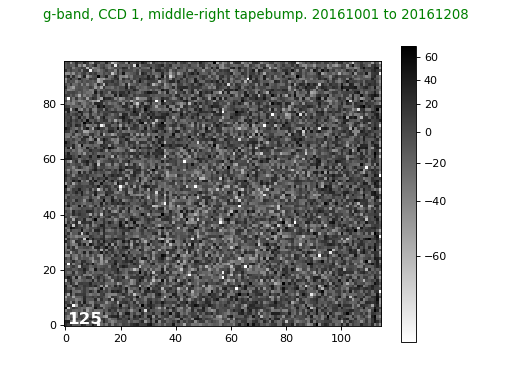

/Users/fco/anaconda3/lib/python3.6/site-packages/astropy/visualization/stretch.py:115: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(values, out=values)
/Users/fco/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


In [9]:
path_list = sel_g_s2_path
anim_interval = 200
anim_repeat = False
anim_save = True
outfnm = 'g_tapebump_20161001t1208.mp4'
#

fig = plt.figure()
ims = []
cnt = 1
for i in path_list:
    aux_x = np.load(i)
    # Normalize image, using astropy zscale for range, and square root for 
    # stretching (?)
    im_norm = ImageNormalize(aux_x, 
                             interval=ZScaleInterval(),
                             stretch=SqrtStretch())
    # Append each of the plots to a list
    kw  = {
        'origin' : 'lower', 
        'animated' : True, 
        'cmap' : 'gray_r',
    }
    im = plt.imshow(aux_x, norm=im_norm, label=i, **kw)
    imaux = plt.text(0.5, 0.5, '{0}'.format(cnt), fontweight='bold', color='w', fontsize=15)
    ims.append([im, imaux])
    cnt += 1
# Using the plot-populated list, create the animation
# blitting (True/False) useful when the frame can be slightly modified to 
# create the next frame
ani = animation.ArtistAnimation(fig, ims, 
                                interval=anim_interval, 
                                blit=True,
                                repeat_delay=1000, 
                                repeat=anim_repeat)
plt.colorbar()
plt.suptitle('g-band, CCD 1, middle-right tapebump. 20161001 to 20161208', color='green')
plt.legend()
if anim_save:
    if (outfnm is None):
        outfnm = 'pid{0}.mp4'.format(os.getpid())
    # Set up formatting for the movie files
    aux_wr1 = animation.writers['ffmpeg']
    aux_writer = aux_wr1(fps=5, metadata=dict(artist='F Paz-Chinchon'), bitrate=2000)
    ani.save(outfnm, writer=aux_writer)
    # plt.show()
else:
    plt.show()

### Visual inspecting the generateed movies, generate a list of 'pure' highlighted tapebumps

In [10]:
g_s2_idx = [11, 12, 13, 14, 15, 19, 21, 28, 31, 32, 42, 45, 46, 56, 58, 76, 107, 114, 118, 119, 123]
len(g_s2_idx)

21

Use the visually selected stamps to make a new selection

**List of paths of the selection used to construct the median image**

In [11]:
cnt = 0
selection_path = []
for i in g_s2_idx:
    p = sel_g_s2_path[i]
    selection_path.append(p)
    if (cnt == 0):
        x3d = np.load(p)
    else:
        x3d = np.dstack((x3d, np.load(p)))
    cnt += 1

Function to construct the median of stacked stamps

In [12]:
def stat_cube(x3d, func):
    ''' Function to calculate the median image per pixel, using an input 
    3dimensional array containing the stamps on which to work.
    Uses numpy iteration tools
    Example for easy usage:
    x3d = np.dstack(array_i)
    x_median = stat_cube(x3d, (lambda: np.median)())
    '''
    out = np.zeros_like(x3d[:, :, 0])
    it = np.nditer(x3d[:, :, 0], flags=['multi_index'])
    while not it.finished:
        i1, i2 = it.multi_index
        out[i1, i2] = func(x3d[i1, i2, :])
        it.iternext()
    return out

Median image

In [13]:
z_median = stat_cube(x3d, (lambda: np.median)())

<IPython.core.display.Javascript object>


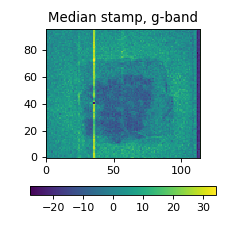

In [14]:
fig, ax = plt.subplots(figsize=(3, 3))
im = ax.imshow(z_median, origin='lower')
ax.set_title('Median stamp, g-band')
plt.colorbar(im, orientation='horizontal')

## Using the median image stamp, make a ratio-based selection using MAD

In [16]:
all_g_s2_path = ['stamps_20161001t1208/tape_centeright-y4a1-20161001t1208_g_D00{0}.npy'.format(e) 
                 for e in g_stat_s2['expnum']]

In [17]:
g_ratio = []
for p in all_g_s2_path:
    # tmp_x = np.std(np.load(p) / z_median)
    tmp_x = np.load(p) / z_median
    tmp_x = np.median(np.abs(tmp_x - np.median(tmp_x)))
    g_ratio.append(tmp_x)

In [18]:
len(g_ratio), g_stat_s2['mjd'].shape

(2771, (2771,))

<IPython.core.display.Javascript object>


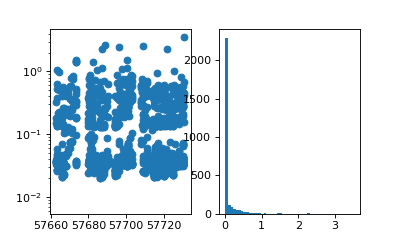

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(5, 3))
ax[0].scatter(g_stat_s2['mjd'], g_ratio)
ax[1].hist(g_ratio, bins=50)
ax[0].set_yscale('log')

In [21]:
# Idea:
# to get the images that has lower MAD and construct a library from them. First I need to plot them for checking
# Ranges: mad < 0.03, 0.03 <= mad < 0.05, 0.05 <= mad < 0.2, mad > 0.2
idx = np.where(np.array(g_ratio) <= 0.03)
#(np.logical_and(np.array(g_ratio) >= 0.05, np.array(g_ratio) < 0.2))
set1_path = np.array(all_g_s2_path)[idx]

<IPython.core.display.Javascript object>


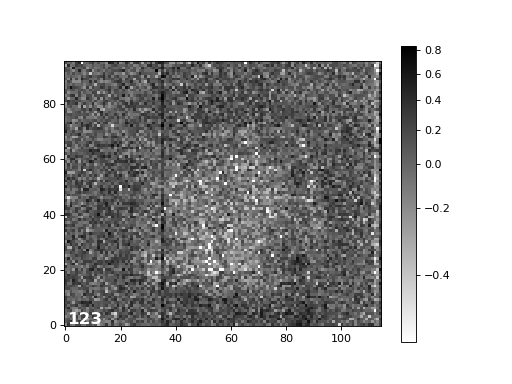

/Users/fco/anaconda3/lib/python3.6/site-packages/astropy/visualization/stretch.py:115: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(values, out=values)
/Users/fco/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


In [22]:
path_list = set1_path
anim_interval = 200
anim_repeat = False
anim_save = True
outfnm = 'set_madlt003.mp4'
#

fig = plt.figure()
ims = []
cnt = 1
for i in path_list:
    aux_x = np.load(i)
    # Normalize image, using astropy zscale for range, and square root for 
    # stretching (?)
    im_norm = ImageNormalize(aux_x, 
                             interval=ZScaleInterval(),
                             stretch=SqrtStretch())
    # Append each of the plots to a list
    kw  = {
        'origin' : 'lower', 
        'animated' : True, 
        'cmap' : 'gray_r',
    }
    im = plt.imshow(aux_x, norm=im_norm, label=i, **kw)
    imaux = plt.text(0.5, 0.5, '{0}'.format(cnt), fontweight='bold', color='w', fontsize=15)
    ims.append([im, imaux])
    cnt += 1
# Using the plot-populated list, create the animation
# blitting (True/False) useful when the frame can be slightly modified to 
# create the next frame
ani = animation.ArtistAnimation(fig, ims, 
                                interval=anim_interval, 
                                blit=True,
                                repeat_delay=1000, 
                                repeat=anim_repeat)
plt.colorbar()
#plt.suptitle('g-band, CCD 1, middle-right tapebump. 20161001 to 20161208', color='green')
plt.legend()
if anim_save:
    if (outfnm is None):
        outfnm = 'pid{0}.mp4'.format(os.getpid())
    # Set up formatting for the movie files
    aux_wr1 = animation.writers['ffmpeg']
    aux_writer = aux_wr1(fps=5, metadata=dict(artist='F Paz-Chinchon'), bitrate=2000)
    ani.save(outfnm, writer=aux_writer)
    # plt.show()
else:
    plt.show()


### From the above ranges (0.03/0.05/0.2), the most consistent was the range for `MAD<0.03`. The problem is: this range exhibits only faint tapebumps.

In [23]:
print( '{0} selected stamps in common'.format( len(set(set1_path).intersection(set(selection_path))) ) )

0 selected stamps in common


If even the original stamps used for construct the medin image were not included, then this is a good test to say the classificator is not good enough

## Another metric, norm for the difference between each stamp and the median image

In [24]:
aux_norm = []
for p in all_g_s2_path:
    tmp = np.load(p)
    aux_norm.append( scipy.linalg.norm(tmp - z_median, ord='fro') )

<IPython.core.display.Javascript object>


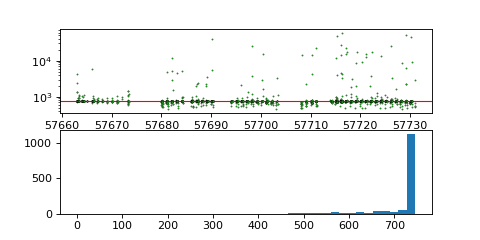

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(6, 3))
ax[0].scatter(g_stat_s2['mjd'], aux_norm, marker='.', color='forestgreen', s=8, edgecolor='k', linewidth=0.1)
ax[0].axhline(np.median(aux_norm), color='r', linewidth=1, zorder=0)
ax[1].hist(aux_norm, range=[0, np.median(aux_norm)], bins=40)
ax[0].set_yscale('log')

<IPython.core.display.Javascript object>


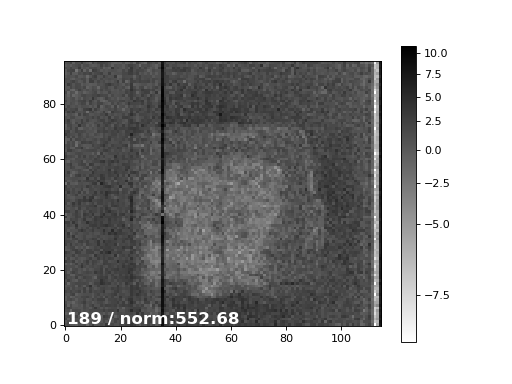

In [26]:
# Lets set a cut below the median
idx = np.where(np.array(aux_norm) < 700)
y1 = np.array(all_g_s2_path)[idx]
y2 = np.array(aux_norm)[idx]
# Remove first 11
y1 = y1[12:]
y2 = y2[12:]

path_list = y1
anim_interval = 200
anim_repeat = False
anim_save = True
#
fig = plt.figure()
ims = []
cnt = 1
for i in path_list:
    aux_x = np.load(i)
    # Normalize image, using astropy zscale for range, and square root for 
    # stretching (?)
    im_norm = ImageNormalize(aux_x, 
                             interval=ZScaleInterval(),
                             stretch=SqrtStretch())
    # Append each of the plots to a list
    kw  = {
        'origin' : 'lower', 
        'animated' : True, 
        'cmap' : 'gray_r',
    }
    im = plt.imshow(aux_x, norm=im_norm, label=i, **kw)
    imaux = plt.text(0.5, 0.5, '{0} / norm:{1:.2f}'.format(cnt, y2[cnt-1]), 
                     fontweight='bold', color='w', fontsize=15)
    ims.append([im, imaux])
    cnt += 1
# Using the plot-populated list, create the animation
# blitting (True/False) useful when the frame can be slightly modified to 
# create the next frame
ani = animation.ArtistAnimation(fig, ims, 
                                interval=anim_interval, 
                                blit=True,
                                repeat_delay=1000, 
                                repeat=anim_repeat)
plt.colorbar()
#plt.suptitle('g-band, CCD 1, middle-right tapebump. 20161001 to 20161208', color='green')
plt.legend()
plt.show()

### This metric works better than the ratio-based. It selects more prominent tapebumps. We can use this result, after discard some few (11)

## Additional similaruty metrics *structural similarity index*

### As stars are present, the min-max inerval is not useful. Use instead the zscale

The structural similarity index is *An image quality metric that assesses the visual impact of three characteristics of an image: luminance, contrast and structure* (Mathworks definition)

Save a dtaframe with the results of SSIM

In [27]:
comp = []
aux_expnum = []
aux_mjd = []
aux_path = []
for p in all_g_s2_path:
    tmp = np.load(p)
    # Calculate the ZScale
    aux_norm = ImageNormalize(tmp, 
                              interval=ZScaleInterval(),)
    aux_ssim = compare_ssim(z_median, 
                            tmp, 
                            data_range=aux_norm.vmax - aux_norm.vmin)
    comp.append(aux_ssim)
    # 
    aux_expnum.append(int(p[-12:-4]))
    aux_mjd.append(g_stat_s2['mjd'][ np.where(g_stat_s2['expnum'] == int(p[-12:-4])) ])
    aux_path.append(p)
comp = np.array(comp)
df_ssim = pd.DataFrame({'ssim' : comp, 
                        'mjd' : aux_expnum, 
                        'expnum' : aux_expnum,
                        'path' : aux_path,})

In [28]:
df_ssim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 4 columns):
expnum    2771 non-null int64
mjd       2771 non-null int64
path      2771 non-null object
ssim      2771 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 86.7+ KB


Quick assessment plot to get the lower cut for the index values

<IPython.core.display.Javascript object>


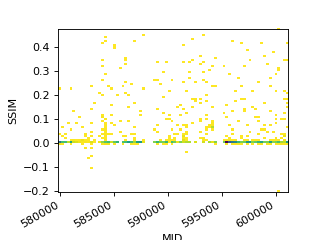

In [29]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.hist2d(df_ssim['mjd'], df_ssim['ssim'], bins=80, cmin=1, cmap='viridis_r')
ax.set_xlabel('MJD')
ax.set_ylabel('SSIM')

plt.gcf().autofmt_xdate()

plt.subplots_adjust(left=0.18, bottom=0.2)
plt.show()

With the cut value, get the set of stamps better matching my set

<IPython.core.display.Javascript object>


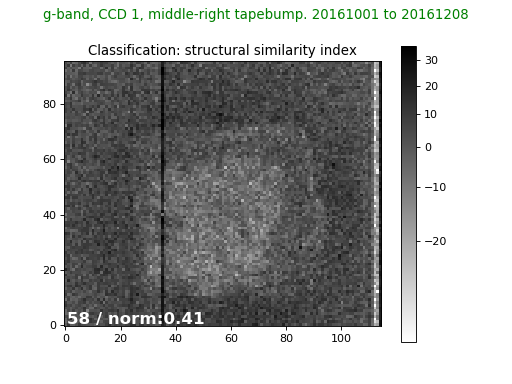

/Users/fco/anaconda3/lib/python3.6/site-packages/astropy/visualization/stretch.py:115: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(values, out=values)
/Users/fco/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


In [30]:
ssim_cutval = 0.25

# idx = np.where(np.array(comp) >= ssim_cutval)
# y1 = np.array(all_g_s2_path)[idx]
# y2 = comp[idx]

df_ssim_a = df_ssim.loc[df_ssim.ssim >= 0.25]

# For plotting
anim_interval = 200
anim_repeat = False
anim_save = True
outfnm = 'set_ssim_gt025.mp4'

fig = plt.figure()
ims = []
cnt = 1
for i in df_ssim_a['path']:
    aux_x = np.load(i)
    im_norm = ImageNormalize(aux_x, 
                             interval=ZScaleInterval(),
                             stretch=SqrtStretch(),)
    # Append each of the plots to a list
    kw  = {
        'origin' : 'lower', 
        'animated' : True, 
        'cmap' : 'gray_r',
    }
    im = plt.imshow(aux_x, norm=im_norm, label=i, **kw)
    imaux = plt.text(0.5, 0.5, 
                     '{0} / norm:{1:.2f}'.format(cnt, df_ssim_a['ssim'].values[cnt-1]), 
                     fontweight='bold', color='w', fontsize=15)
    ims.append([im, imaux])
    cnt += 1
# Using the plot-populated list, create the animation
# blitting (True/False) useful when the frame can be slightly modified to 
# create the next frame
ani = animation.ArtistAnimation(fig, ims, 
                                interval=anim_interval, 
                                blit=True,
                                repeat_delay=1000, 
                                repeat=anim_repeat)
plt.colorbar()
plt.suptitle('g-band, CCD 1, middle-right tapebump. 20161001 to 20161208', color='green')
plt.title('Classification: structural similarity index')
plt.legend()

if anim_save:
    if (outfnm is None):
        outfnm = 'pid{0}.mp4'.format(os.getpid())
    # Set up formatting for the movie files
    aux_wr1 = animation.writers['ffmpeg']
    aux_writer = aux_wr1(fps=5, metadata=dict(artist='F Paz-Chinchon'), bitrate=2000)
    ani.save(outfnm, writer=aux_writer)

plt.show()

Using the above defined indices for the selected values, jintly plot the main sample and the selection

NOTE: change the usage of arrays to the df_ssim

<IPython.core.display.Javascript object>


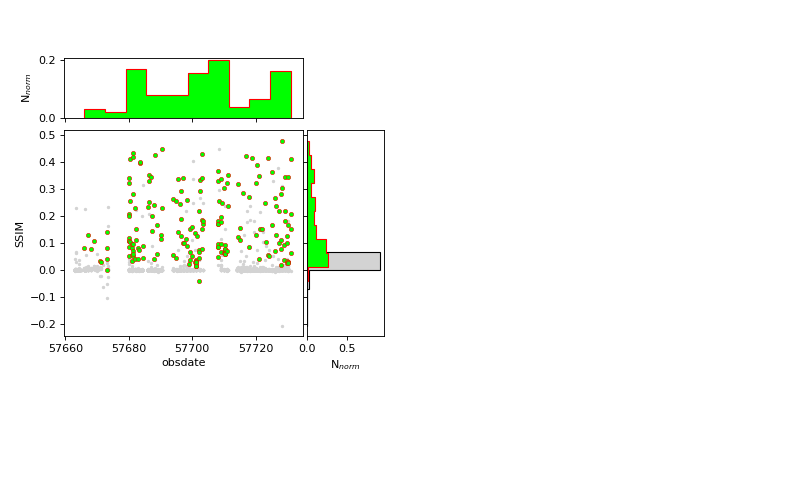

[]

In [31]:
fig = plt.figure(figsize=(10,6))

gs1 = gridspec.GridSpec(4, 4)
gs1.update(left=0.08, right=0.48, wspace=0.05, bottom=0.3)
ax1 = fig.add_subplot(gs1[1: , :-1])
ax2 = fig.add_subplot(gs1[1: , -1:])#, sharey=ax1)
ax3 = fig.add_subplot(gs1[0 , :-1])#, sharex=ax1)

# Main set
kw1 = {
    'color' : 'lightgray',
    's' : 4,
}
ax1.scatter(g_stat_s2['mjd'], comp, **kw1)
# Selection
kw2 = {
    'color' : 'lime',
    's' : 15,
    'edgecolor' : 'red',
    'lw' : 0.5,
}
ax1.scatter(g_stat_s2['mjd'][idx], comp[idx], **kw2)

# Histogram for both samples
waux1 = np.ones_like(comp) / comp.size
ax2.hist(comp, orientation='horizontal', weights=waux1, histtype='stepfilled', 
         color='lightgray', edgecolor='k')
waux2 = np.ones_like(comp[idx]) / comp[idx].size
ax2.hist(comp[idx], orientation='horizontal', weights=waux2, histtype='stepfilled', 
         color='lime', edgecolor='r')
#
waux3 = np.ones_like(g_stat_s2['mjd'][idx]) / g_stat_s2['mjd'][idx].size
ax3.hist(g_stat_s2['mjd'][idx], orientation='vertical', weights=waux3, 
         histtype='stepfilled', color='lime', edgecolor='r')

# If sharing axis, then when removing labels from one subplot, the
# other gtes its labels removed too
ax2.set_ylim(ax1.set_ylim())
ax3.set_xlim(ax1.get_xlim())

# Data labels
ax1.set_xlabel('obsdate')
ax1.set_ylabel('SSIM')
ax2.set_xlabel(r'N$_{norm}$')
ax3.set_ylabel(r'N$_{norm}$')

# Remove axis labels
ax2.set_yticklabels([])
ax3.set_xticklabels([])


## SSIM worked well. Join the list with the visually selected.

Path list

In [ ]:
sel_stamp_path = np.r_[np.array(all_g_s2_path)[idx], np.array(selection_path)]
sel_stamp_path = np.unique(sel_stamp_path)

Save list to a text file

In [ ]:
aux_out = 'stamps_PID{0}.txt'.format(os.getpid())
np.savetxt(aux_out, sel_stamp_path, fmt='%s')

In [ ]:
len(selection_path), np.array(all_g_s2_path)[idx].size, sel_stamp_path.size

Expnums and stat values

In [ ]:
l_expnum = [int(p[-12:-4]) for p in sel_stamp_path]
l_g_stat = g_stat_s2[np.isin(g_stat_s2['expnum'], l_expnum)]

In [ ]:
l_g_stat['nite'].min(), l_g_stat['nite'].max()

**NOTE: The time plot works for scatter, but I did not make it work for the histogram**

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
# Time conversion: MJD to time
t = time.Time(l_g_stat['mjd'], format='mjd', scale='utc')
kw1 = {
    'color' : 'lime',
    'xdate' : True,
    'marker' : 'o',
    'markersize' : 6,
    'markeredgecolor' : 'red',
}
ax.plot_date(t.plot_date,  **kw1)

# Rotate labels
plt.setp( ax.xaxis.get_majorticklabels(), rotation=40 )

ax.set_xlabel('obsdate')
ax.set_ylabel('SSIM')
ax.set_title('SSIM Selection')

plt.subplots_adjust(bottom=0.3)